### We examine the relations between forces, encoders, steps, and positions
This test was done on Thursday night (3/4/20)

In [2]:
from openpyxl import load_workbook

from astropy.time import Time
from datetime import timedelta, datetime
from lsst_efd_client import EfdClient

import matplotlib.pyplot as plt
import scipy.io
import numpy as np
import pandas as pd

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [3]:
start = Time('2020-03-05T22:27:00') #this is UTC
end = Time('2020-03-05T22:38:00') 

In [4]:
def readSqXlsx(c1,c2):
    wb = load_workbook(filename='M2basicTest.xlsx', read_only=True)
    ws = wb['Sheet1']
    data_rows = []
    for row in ws[c1:c2]:
        data_cols = []
        for cell in row:
            data_cols.append(cell.value)
        data_rows.append(data_cols)
    return np.array(data_rows)
def getSlope(x, y):
    return np.mean(y[1:]-y[:-1])/np.mean(x[1:]-x[:-1])
def getDelta(y):
    return np.mean(y[1:]-y[:-1])

#### We recorded some data in the Excel file by hand. Let's look at those first
Open loop: the input was B1 stroke 

In [5]:
aa = readSqXlsx('C3','N8')

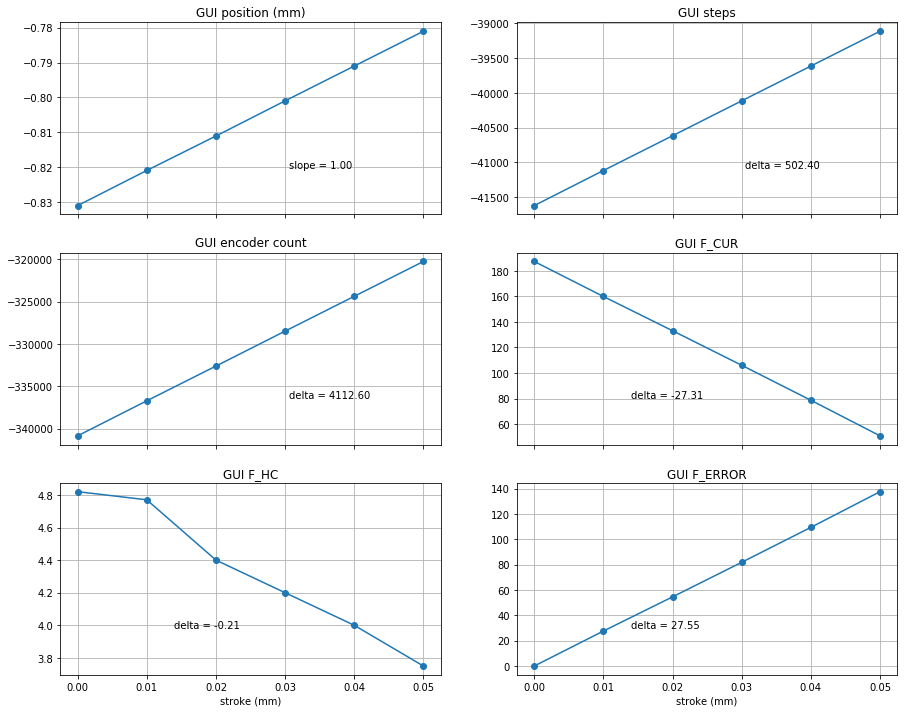

In [7]:
fig, ax = plt.subplots(3,2, figsize=(15, 3*4), sharex=True)
inmm = aa[:,0]
guimm = aa[:,1]
ax[0][0].plot(inmm, guimm,'-o')
ax[0][0].text(0.6, 0.24, "slope = %.2f"%getSlope(inmm, guimm), color = 'black', transform=ax[0][0].transAxes)
ax[0][0].grid()
ax[0][0].set_title('GUI position (mm)');

guisteps = aa[:,2]
ax[0][1].plot(inmm, guisteps,'-o')
ax[0][1].text(0.6, 0.24, "delta = %.2f"%getDelta(guisteps), color = 'black', transform=ax[0][1].transAxes)
ax[0][1].grid()
ax[0][1].set_title('GUI steps');

guiec = aa[:,3]
ax[1][0].plot(inmm, guiec,'-o')
ax[1][0].text(0.6, 0.24, "delta = %.2f"%getDelta(guiec), color = 'black', transform=ax[1][0].transAxes)
ax[1][0].grid()
ax[1][0].set_title('GUI encoder count');

#F_cmd in GUI does not change

guifcur = aa[:,5]
ax[1][1].plot(inmm, guifcur,'-o')
ax[1][1].text(0.3, 0.24, "delta = %.2f"%getDelta(guifcur), color = 'black', transform=ax[1][1].transAxes)
ax[1][1].grid()
ax[1][1].set_title('GUI F_CUR');

guifhc = aa[:,6]
ax[2][0].plot(inmm, guifhc,'-o')
ax[2][0].text(0.3, 0.24, "delta = %.2f"%getDelta(guifhc), color = 'black', transform=ax[2][0].transAxes)
ax[2][0].set_xlabel('stroke (mm)')
ax[2][0].set_title('GUI F_HC');
ax[2][0].grid()

guife = aa[:,7]
ax[2][1].plot(inmm, guife,'-o')
ax[2][1].text(0.3, 0.24, "delta = %.2f"%getDelta(guife), color = 'black', transform=ax[2][1].transAxes)
ax[2][1].set_xlabel('stroke (mm)')
ax[2][1].grid()
ax[2][1].set_title('GUI F_ERROR');

#EFD encoder position is same as GUI position.
#EFD F_CUR is same as GUI F_CUR

Questions:
* EFD steps do not seem to change, is that because of digits we were able to read from Chronograf? Does this match to anythiing in the GUI?
* F_CMD seems to be LUT force. It doesn't change in this process. F_CUR is decreasing, is that the force being applied? If it gets smaller, F_HC needs to get bigger on every actuator, but it decreases. Why. Need to check all forces from EFD or bin file.

In [8]:
client = EfdClient('summit_efd')
csc_index = 1

In [9]:
start.tai

<Time object: scale='tai' format='isot' value=2020-03-05T22:27:37.000>

In [10]:
#known bug, M2 sends utc everywhere.
df = await client.select_time_series('lsst.sal.MTM2.axialActuatorAbsolutePositionSteps', '*', 
                                     (start-timedelta(seconds=37)).tai, (end-timedelta(seconds=37)).tai, csc_index)
df.head()

,axialAbsolutePositionSteps0,axialAbsolutePositionSteps1,axialAbsolutePositionSteps10,axialAbsolutePositionSteps11,axialAbsolutePositionSteps12,axialAbsolutePositionSteps13,axialAbsolutePositionSteps14,axialAbsolutePositionSteps15,axialAbsolutePositionSteps16,axialAbsolutePositionSteps17,...,axialAbsolutePositionSteps71,axialAbsolutePositionSteps8,axialAbsolutePositionSteps9,private_host,private_kafkaStamp,private_origin,private_rcvStamp,private_revCode,private_seqNum,private_sndStamp
2020-03-05 22:27:00.036000+00:00,-316,-223,145,90,-41,-38,-45,0,-64,-111,...,-4,84,98,1,1.583447e+09,37859,1.583447e+09,5c3efb6d,5562632,1.583447e+09
2020-03-05 22:27:00.084000+00:00,-316,-223,145,90,-41,-38,-45,0,-64,-111,...,-4,84,98,1,1.583447e+09,37859,1.583447e+09,5c3efb6d,5562641,1.583447e+09
2020-03-05 22:27:00.134000+00:00,-316,-223,145,90,-41,-38,-45,0,-64,-111,...,-4,84,98,1,1.583447e+09,37859,1.583447e+09,5c3efb6d,5562650,1.583447e+09
2020-03-05 22:27:00.184000+00:00,-316,-223,145,90,-41,-38,-45,0,-64,-111,...,-4,84,98,1,1.583447e+09,37859,1.583447e+09,5c3efb6d,5562659,1.583447e+09
2020-03-05 22:27:00.236000+00:00,-316,-223,145,90,-41,-38,-45,0,-64,-111,...,-4,84,98,1,1.583447e+09,37859,1.583447e+09,5c3efb6d,5562670,1.583447e+09


In [11]:
df.tail()

,axialAbsolutePositionSteps0,axialAbsolutePositionSteps1,axialAbsolutePositionSteps10,axialAbsolutePositionSteps11,axialAbsolutePositionSteps12,axialAbsolutePositionSteps13,axialAbsolutePositionSteps14,axialAbsolutePositionSteps15,axialAbsolutePositionSteps16,axialAbsolutePositionSteps17,...,axialAbsolutePositionSteps71,axialAbsolutePositionSteps8,axialAbsolutePositionSteps9,private_host,private_kafkaStamp,private_origin,private_rcvStamp,private_revCode,private_seqNum,private_sndStamp
2020-03-05 22:37:59.788000+00:00,-316,-223,145,90,-41,-38,-45,0,-64,-111,...,-4,84,98,1,1.583448e+09,37859,1.583448e+09,5c3efb6d,5682139,1.583448e+09
2020-03-05 22:37:59.840000+00:00,-316,-223,145,90,-41,-38,-45,0,-64,-111,...,-4,84,98,1,1.583448e+09,37859,1.583448e+09,5c3efb6d,5682148,1.583448e+09
2020-03-05 22:37:59.890000+00:00,-316,-223,145,90,-41,-38,-45,0,-64,-111,...,-4,84,98,1,1.583448e+09,37859,1.583448e+09,5c3efb6d,5682157,1.583448e+09
2020-03-05 22:37:59.939000+00:00,-316,-223,145,90,-41,-38,-45,0,-64,-111,...,-4,84,98,1,1.583448e+09,37859,1.583448e+09,5c3efb6d,5682166,1.583448e+09
2020-03-05 22:37:59.989000+00:00,-316,-223,145,90,-41,-38,-45,0,-64,-111,...,-4,84,98,1,1.583448e+09,37859,1.583448e+09,5c3efb6d,5682175,1.583448e+09


### Answer to first questin above: Not sure what is going on. EFD does show this is -316 everywhere.

In [12]:
df = await client.select_time_series('lsst.sal.MTM2.axialForcesMeasured', '*', 
                                     (start-timedelta(seconds=37)).tai, (end-timedelta(seconds=37)).tai, csc_index)
df.head()

,axialForceMeasured0,axialForceMeasured1,axialForceMeasured10,axialForceMeasured11,axialForceMeasured12,axialForceMeasured13,axialForceMeasured14,axialForceMeasured15,axialForceMeasured16,axialForceMeasured17,...,axialForceMeasured71,axialForceMeasured8,axialForceMeasured9,private_host,private_kafkaStamp,private_origin,private_rcvStamp,private_revCode,private_seqNum,private_sndStamp
2020-03-05 22:27:00.034000+00:00,187.329651,187.896790,189.828430,191.945404,187.833160,189.062744,187.264053,189.805222,190.257690,184.900726,...,251.830734,183.678207,183.826111,1,1.583447e+09,37859,1.583447e+09,f6f121a3,5562630,1.583447e+09
2020-03-05 22:27:00.082000+00:00,187.239090,187.927277,189.838623,191.955521,187.787247,189.062744,187.258987,189.800125,190.191605,184.865326,...,251.835754,183.729187,183.851501,1,1.583447e+09,37859,1.583447e+09,f6f121a3,5562639,1.583447e+09
2020-03-05 22:27:00.132000+00:00,187.344757,187.917114,189.940475,191.980835,187.751541,189.093170,187.304489,189.779785,190.115341,184.789490,...,251.785461,183.871918,183.917511,1,1.583447e+09,37859,1.583447e+09,f6f121a3,5562648,1.583447e+09
2020-03-05 22:27:00.182000+00:00,187.299469,187.932358,189.823349,192.071960,187.802551,189.072891,187.284271,189.810303,190.257690,184.809708,...,251.740204,183.734283,184.049515,1,1.583447e+09,37859,1.583447e+09,f6f121a3,5562657,1.583447e+09
2020-03-05 22:27:00.234000+00:00,187.329651,187.896790,189.818253,191.990967,187.705627,189.032318,187.264053,189.835739,190.196686,184.850159,...,251.775406,183.749573,183.907349,1,1.583447e+09,37859,1.583447e+09,f6f121a3,5562668,1.583447e+09


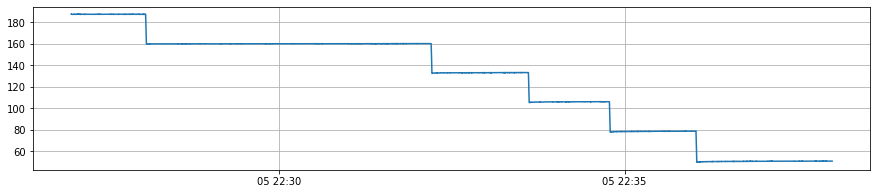

In [13]:
fig, ax = plt.subplots(figsize=(15,3))
plt.plot(pd.to_datetime(df.private_sndStamp, unit='s'), df.axialForceMeasured0)
plt.grid();
#forces on B1 are consistent between EFD and GUI

### if these are indeed the total forces measured, the sum should not change during this experiement.

In [14]:
print('beginning total = %.2f, ending total = %.2f'%(sum([df['axialForceMeasured%d'%i][0] for i in range(72)]), 
                     sum([df['axialForceMeasured%d'%i][-1] for i in range(72)])))
#LTS-107, sec 3.8.1 specifies M2 mirror mass budget ass 1600kg
print('mass budget = %.2f'%(1600*9.8))

beginning total = 15578.19, ending total = 15576.70
mass budget = 15680.00


In [32]:
mat = scipy.io.loadmat('mat/0305/CellTelemetry_2020-03-05_203926_002.mat')
print(mat['data'].dtype.names)
mdata = mat['data']  # variable in mat file
mdtype = mdata.dtype  # dtypes of structures are "unsized objects"
ndata = {n: mdata[n][0, 0] for n in mdtype.names}
t = [datetime.strptime(ts[0][0], '%d-%b-%Y %H:%M:%S.%f') for ts in ndata['timestamp']]
t = np.array([ti+ timedelta(hours=4, minutes=3, seconds=-5) for ti in t]) #convert to utc, 4 hours ahead of Rochester
#The timestamps in the EFD and those in the binary files have a ~3 minutes offset (after considering time zones). 
#Could that be because of clock synchronization? between server and cRIO, for example?
#Te-Wei: No, both are from the server. There are additional processing after writing to binary, 
# and before data is sent to SAL.
#Bo: But, how come binary timestamps are earlier than EFD private_sndStamp. 
# The latter is consistent with clocks on Bo's laptop with accuracy of 1 minute.
columns = [n for n, v in ndata.items()]

def insertHPColumns(a):
    [n1, n2] = a.shape
    b = np.zeros((n1, n2+6))
    b[:,:5] = a[:,:5] #0,1,2,3,4; 5=B6, skip
    b[:,6:15] = a[:,5:14] #6,7,8...14; 15=B16, skip
    b[:,16:25] = a[:,14:23] #16, 17, 18 .... 24; 25=B26, skip
    b[:,26:73] = a[:,23:70]#26, 27, 28... 72; 73 = A2, skip
    b[:,74] =a[:,70]#74; 75 = A4, skip
    b[:,76] = a[:,71]#76; 77 = A6, skip
    return b
ndata['f_hp'] = insertHPColumns(ndata['f_hp'])
ndata['f_error'] = insertHPColumns(ndata['f_error'])

('time_delta', 'comm_cntr', 'ilc_status', 'encoder', 'force', 'disp_sensors', 'temp_sensors', 'inclinometer', 'step_cmd', 'inc_cal', 'elevation_ts_i', 'elevation_ts_u', 'elevation_ang', 'el_status', 'disp_proc', 'disp_status', 'temp_proc', 'temp_status', 'hp', 'f_e', 'f_0', 'f_a', 'f_f', 'T_u', 'T_x', 'T_y', 'T_r', 'f_hp', 'f_cmd', 'f_error', 'f_delta', 'f_cmd_wrd', 'mtr_voltage', 'comm_voltage', 'mtr_current', 'comm_current', 'dig_input', 'dig_output', 'mtr_voltage_proc', 'comm_voltage_proc', 'mtr_current_proc', 'comm_current_proc', 'time', 'timestamp')


In [17]:
# we could form a pandas dataframe using the mat data. But ndata can be just good enough. So we skip this.
#newcolumns = []
#for c in columns:
#    nc = ndata[c].shape[1]
#    if nc==1:
#        newcolumns.append(c)
#    else:
#        for i in range(nc):
#            newcolumns.append('%s_%d'%(c,i+1))
# now make a data frame, setting the time stamps as the index
#dfm = pd.DataFrame(np.concatenate([ndata[c] for c in columns], axis=1),
#                  index=[datetime.strptime(ts[0][0], '%d-%b-%Y %H:%M:%S.%f') for ts in ndata['timestamp']],
#                  columns=newcolumns)

In [33]:
ndata['hp']
#these indices start from 1. So, A2,A4, A6 are hardpoints

array([[ 6, 16, 26, 74, 76, 78],
       [ 6, 16, 26, 74, 76, 78],
       [ 6, 16, 26, 74, 76, 78],
       ...,
       [ 6, 16, 26, 74, 76, 78],
       [ 6, 16, 26, 74, 76, 78],
       [ 6, 16, 26, 74, 76, 78]], dtype=uint8)

In [18]:
#This starting time is now consistent with binary file name as well
t[0]

datetime.datetime(2020, 3, 5, 22, 19, 27, 730000)

In [19]:
nn = len(t)
print('%d, time duration = %.0f minutes'%(nn, nn/20/60))

59999, time duration = 50 minutes


In [34]:
# cut out only the time period we are interested in
idx = (t>start) & (t<end)
data = {}
for n, v in ndata.items():
    if len(v.shape)>1:
        data[n] = v[idx,:]
    else:
        data[n] = v[idx]
t = t[idx]

### Now EFD force data match the binary force

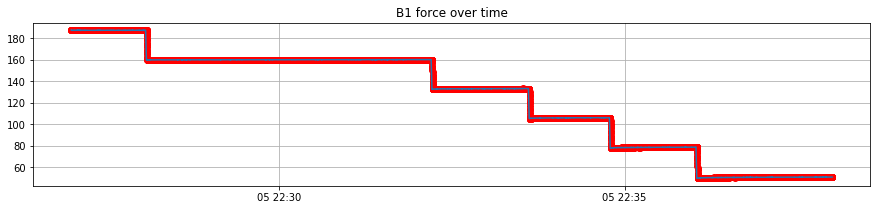

In [21]:
fig, ax = plt.subplots(figsize=(15,3))
plt.plot(t, data['force'][:,0],'-ro')
plt.plot(pd.to_datetime(df.private_sndStamp, unit='s'), df.axialForceMeasured0)
plt.title('B1 force over time')
plt.grid();

#### All actuators forces, EFD vs. binary, over 5s

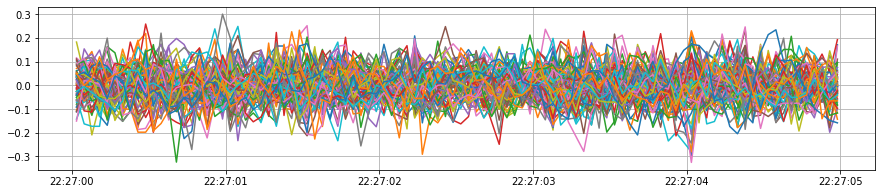

In [22]:
fig, ax = plt.subplots(figsize=(15,3))
for i in range(72):
    plt.plot(t[:100], data['force'][:100,i]-np.array(df['axialForceMeasured%d'%i][:100]))
plt.grid();

#### When we looked at the GUI, it appeared that F_CMD - F_CUR - F_HC = F_ERROR. Is that always true?
No, see below

In [35]:
data['f_hp'].shape

(13200, 78)

act#6, F_HC[0] = 0.00, residual[0] = 4.47
act#16, F_HC[0] = 0.00, residual[0] = 6.62
act#26, F_HC[0] = 0.00, residual[0] = 6.17


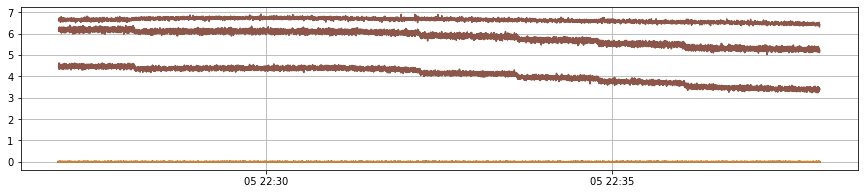

In [39]:
fig, ax = plt.subplots(figsize=(15,3))
for i in range(72):
    aa = data['f_cmd'][:,i] - data['force'][:,i] - data['f_hp'][:,i]-data['f_error'][:,i]#-data['f_delta'][:,i]
    plt.plot(t, aa)
    if (aa[0]>4) or i==5 or i==15 or i==25:
        print('act#%d, F_HC[0] = %.2f, residual[0] = %.2f'%(i+1, data['f_hp'][0,i], aa[0]))
plt.grid()

Text(0.5, 1.0, 'f_delta')

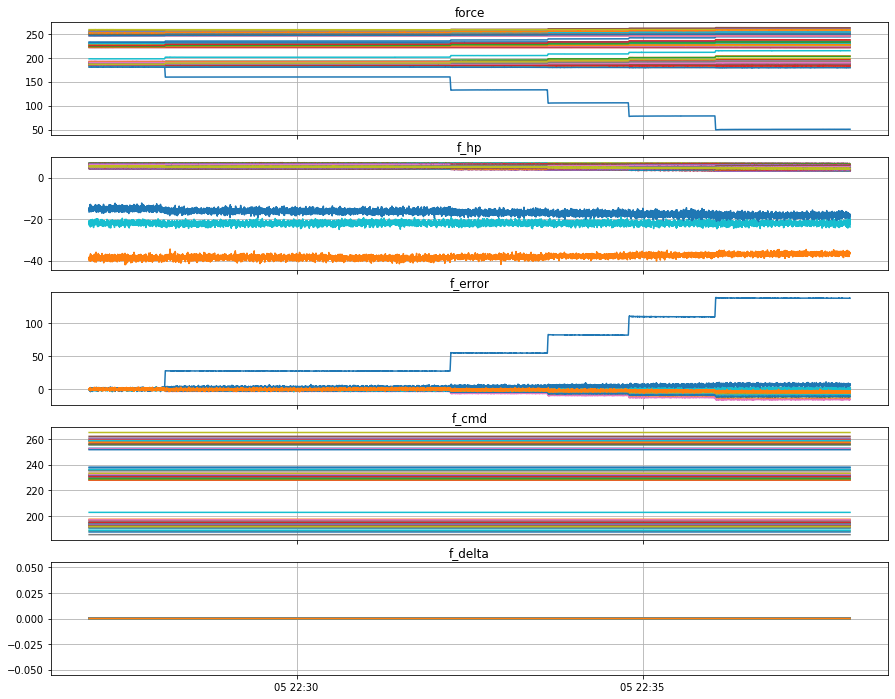

In [57]:
fig, ax = plt.subplots(5,1, sharex=True, figsize=(15,12))
for i in range(72):
    ax[0].plot(t, data['force'][:,i] )
ax[0].grid()
ax[0].set_title('force')

for i in range(72):
    ax[1].plot(t, data['f_hp'][:,i] )
ax[1].grid()
ax[1].set_title('f_hp')

for i in range(72):
    ax[2].plot(t, data['f_error'][:,i] )
ax[2].grid()
ax[2].set_title('f_error')

for i in range(72):
    ax[3].plot(t, data['f_cmd'][:,i] )
ax[3].grid()
ax[3].set_title('f_cmd')

for i in range(72):
    ax[4].plot(t, data['f_delta'][:,i] )
ax[4].grid()
ax[4].set_title('f_delta');
#fig.subplots_adjust(hspace=0)

sum = 319.77 N


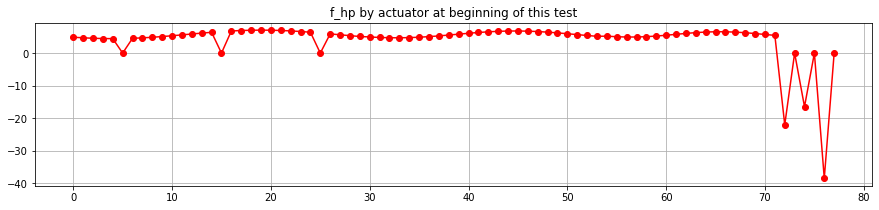

In [37]:
x0 = np.linspace(1,len(aa),len(aa))
fig, ax = plt.subplots(figsize=(15,3))
plt.plot(data['f_hp'][0,:],'-ro')
plt.grid()
plt.title('f_hp by actuator at beginning of this test')
print('sum = %.2f N'%sum(data['f_hp'][0,:]))
#sh*t, word doc says F_HC = f_hp, but why it is not zero on B6,16,26??? what is going on with last 3 actuators???

#### observations from above:
* f_cmd stays unchanged. This is the LUT forces.
* force (F_CUR in GUI) is the total measured forces from the load cells. This is not the total force minus the FB forces, because the sum of this doesn't change over time, and the sum is equal to the weight of the mirror.
* we don't know what f_hp is. 
    * The Harris document (T14900-1011) clearly states that F_HC (GUI) = f_hp (binary).
    * for B6, B16, and B26 - This doesn't agree with the GUI F_HC, because it is not equal to 0. Te-Wei checked the LabView code, F_HC for B6, B16, and B26 are simply set to 0 before they are displayed on the GUI. 
    * for D16, D17, D18 - We do not understand why f_hp for these 3 actuators (#70,71,72) are so different from other actuators. A request has been sent to Franco and others in Chile to take pictures of the GUI.
* f_delta may have been intended to be used for something, but it is currently empty.
* since we don't understand f_hp, and F_CMD - F_CUR - F_HC = F_ERROR doesn't hold, we don't know what f_error is.
#### The only thing we have (the only thing we can still assume), is that F_CUR is the measured forces, total force. At least we see no evidence against it yet.

#### We also have a coordinate system problem.
The FEA coordinate system is
<img src="M2_FEA_RCS.png">

In [60]:
aa = np.loadtxt('../../github/data/M2_1um_72_force.txt')
# to have +x going to right, and +y going up, we need to transpose and reverse x and y
xact = -aa[:,2]
yact = -aa[:,1]
#actLabels = [i+10 for i in range(72)]

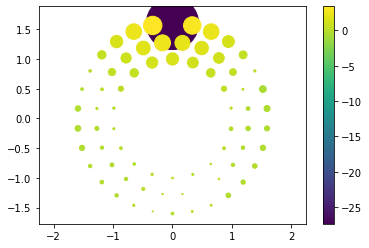

In [61]:
aa = data['force'][2000,:72]- data['force'][0,:72] 
plt.scatter(xact, yact, c=aa, s=abs(aa)*100)
plt.axis('equal')
plt.colorbar()

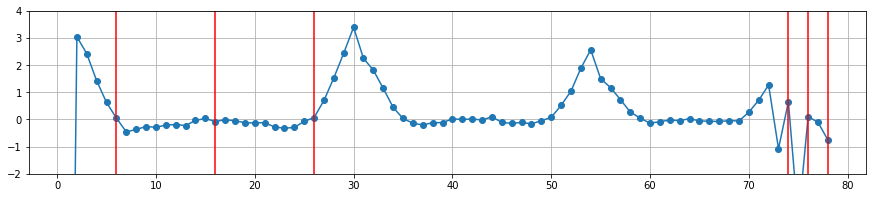

In [79]:
aa = data['force'][2000,:]- data['force'][0,:] 
fig, ax = plt.subplots(figsize=(15,3))
plt.plot(x0,aa,'-o')
plt.grid()
yy=[-2, 4]
plt.ylim(yy)
for i in data['hp'][0]:
    plt.plot([i,i],yy,'-r')
#ax.set_xticklabels(actLabels)

act#6, F_HC[0] = 4.55, residual[0] = -0.08
act#16, F_HC[0] = 6.94, residual[0] = -0.33
act#26, F_HC[0] = 5.36, residual[0] = 0.81
act#70, F_HC[0] = -22.07, residual[0] = 28.08
act#71, F_HC[0] = -16.48, residual[0] = 22.13
act#72, F_HC[0] = -38.52, residual[0] = 43.93


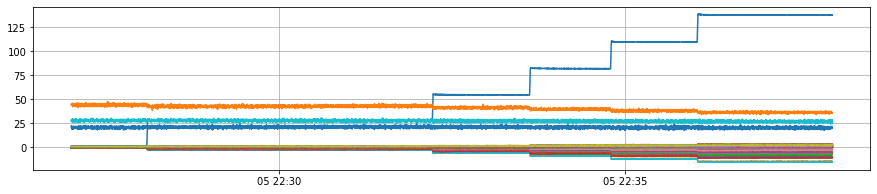

In [25]:
fig, ax = plt.subplots(figsize=(15,3))
for i in range(72):
    aa = data['f_cmd'][:,i] - data['force'][:,i] - data['f_hp'][:,i]#-data['f_error'][:,i]
    plt.plot(t, aa)
    if (aa[0]>10) or i==5 or i==15 or i==25:
        print('act#%d, F_HC[0] = %.2f, residual[0] = %.2f'%(i+1, data['f_hp'][0,i], aa[0]))
plt.grid()

### This is our understanding from this test:
* stroke = position
* stroke and position are proportional to steps and encoder, 
    * each micron is 50 steps, 410 encoder count
* stroke and position are inversely proportional to forces (M2 facing down)
    * each micron is 2.7N
* M2 FB system seems to be working, but f_hp is useless, so are f_error and f_delta.
* Perhpas f_cmd is the LUT forces. We will check this with another notebook.
### Q: if force is linear with position (~2.7N/um), why cannot we derived mirror surface shape from the forces using this? Then there is no need to care about bending modes or FEA.